### Kelas Inkubasi
# Business Data Analytics
SMK Telkom x WPC x BeData Technology

### Business Understanding : merumuskan pertanyaan bisnis

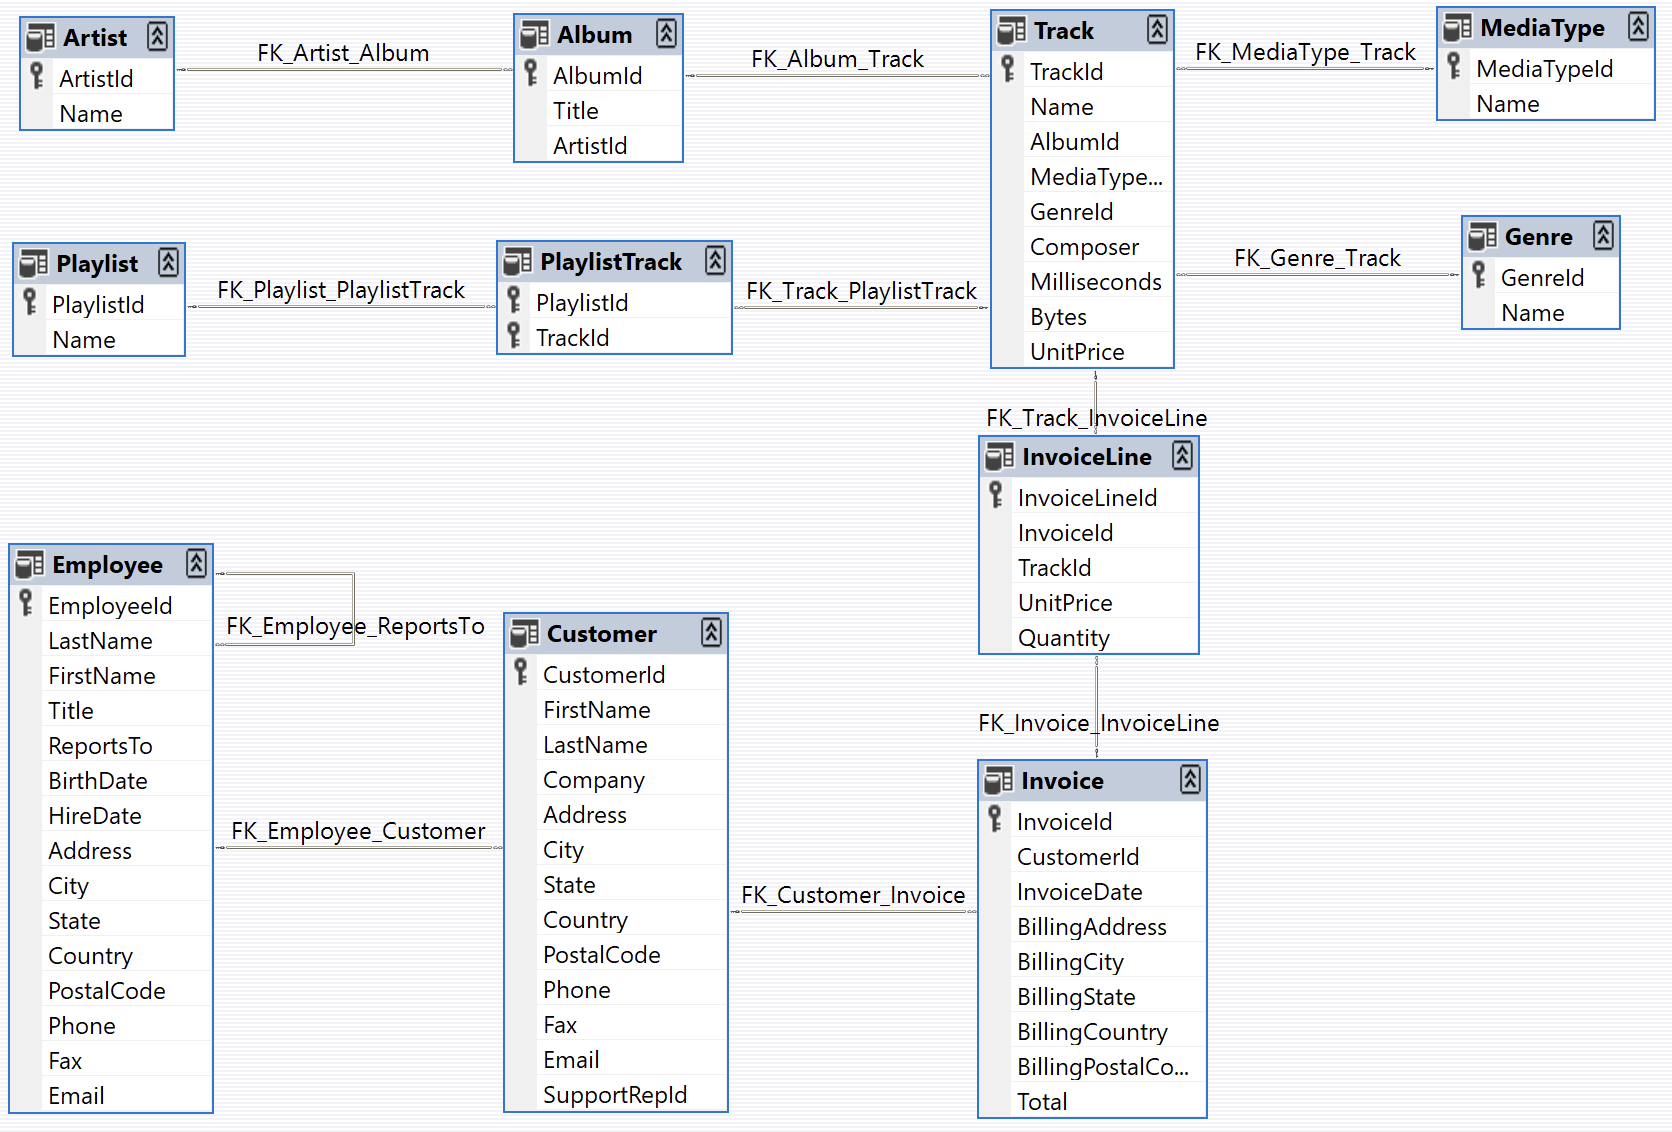

##### Problem : 
Bayangkan Anda adalah seorang analis data untuk "Chinook," sebuah toko musik digital. Model bisnis Chinook adalah menjual trek musik digital kepada pelanggan di seluruh dunia. Manajemen senior datang kepada Anda dengan tujuan yang sangat umum: ***"Kami ingin meningkatkan pendapatan dan memahami pelanggan kami dengan lebih baik."***
Tujuan ini, meskipun penting, terlalu luas untuk dianalisis secara langsung. Tugas Anda adalah memecah tujuan ini menjadi serangkaian pertanyaan bisnis yang spesifik, terukur, dan dapat dijawab menggunakan data yang tersedia dalam basis data perusahaan. Skema basis data adalah peta Anda untuk memahami aset data yang dimiliki.

##### Questions: 
1. Siapa 10 pelanggan dengan total pembelian tertinggi yang secara konsisten menyumbang minimal 20% dari total revenue perusahaan, dan berasal dari 3 negara dengan kontribusi penjualan terbesar, selama periode Januari 2023 hingga Desember 2024?
2. Dalam upaya mencapai target peningkatan pendapatan, dapatkah kita menganalisis total pendapatan yang dihasilkan oleh lima genre musik teratas dan lima artis terlaris secara triwulanan selama dua tahun fiskal terakhir, dan apakah data ini dapat mengungkap adanya tren musiman atau pergeseran preferensi pelanggan yang dapat kita manfaatkan untuk memfokuskan promosi yang ditargetkan?
3. Kota/negara mana yang paling banyak ditangani tiap Support Rep?

## Data Wrangling

### Gathering

In [76]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
load_dotenv()
import os

In [77]:
HOST = os.getenv("HOST")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")
PORT = os.getenv("PORT")
DB_NAME = os.getenv("DB_NAME")
SSL_MODE = os.getenv("SSL_MODE")

In [78]:
SERVICE_URI = f"postgres://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}?sslmode={SSL_MODE}"
uri = SERVICE_URI.replace("postgres://", "postgresql+psycopg2://", 1)
engine = create_engine(uri)

#### customer

In [79]:
#mengambil data dari tabel customer
df_customer = pd.read_sql(
    '''
    SELECT * 
    FROM customer
    ''', 
    con=engine
)
df_customer.head()

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


#### invoice

In [80]:
#mengambil data dari tabel invoice
df_invoice = pd.read_sql(
    '''SELECT * 
    FROM invoice''',
    con=engine
)
df_invoice.head()

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
0,1,2,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2021-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2021-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2021-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2021-01-11,69 Salem Street,Boston,MA,USA,2113,13.86


#### invoice line

In [81]:
#mengambil data dari tabel invoice_line
df_invoice_line = pd.read_sql(
    '''SELECT *
    FROM invoice_line''',
    con=engine
)
df_invoice_line.head()

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1


#### Assesing & Cleaning

In [82]:
# mengambil info tabel customer
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     59 non-null     int64 
 1   first_name      59 non-null     object
 2   last_name       59 non-null     object
 3   company         10 non-null     object
 4   address         59 non-null     object
 5   city            59 non-null     object
 6   state           30 non-null     object
 7   country         59 non-null     object
 8   postal_code     55 non-null     object
 9   phone           58 non-null     object
 10  fax             12 non-null     object
 11  email           59 non-null     object
 12  support_rep_id  59 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.1+ KB


In [83]:
# menghitung jumlah duplikat pada tabel customer
df_customer.duplicated().sum()

np.int64(0)

In [84]:
# mengahpus kolom kosong yang tidak diperlukan
df_customer = df_customer.drop(df_customer[['company','state','fax']], axis=1)
df_customer.head()

,customer_id,first_name,last_name,address,city,country,postal_code,phone,email,support_rep_id
0,1,Luís,Gonçalves,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3
1,2,Leonie,Köhler,Theodor-Heuss-Straße 34,Stuttgart,Germany,70174,+49 0711 2842222,leonekohler@surfeu.de,5
2,3,François,Tremblay,1498 rue Bélanger,Montréal,Canada,H2G 1A7,+1 (514) 721-4711,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,Ullevålsveien 14,Oslo,Norway,0171,+47 22 44 22 22,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,Klanova 9/506,Prague,Czech Republic,14700,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [ ]:
# menggabungkan kolom first_name dan last_name menjadi full name
df_customer['full name'] = df_customer['first_name'] + ' ' + df_customer['last_name']
df_customer.head()

,customer_id,first_name,last_name,address,city,country,postal_code,phone,email,support_rep_id,full name
0,1,Luís,Gonçalves,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3,Luís Gonçalves
1,2,Leonie,Köhler,Theodor-Heuss-Straße 34,Stuttgart,Germany,70174,+49 0711 2842222,leonekohler@surfeu.de,5,Leonie Köhler
2,3,François,Tremblay,1498 rue Bélanger,Montréal,Canada,H2G 1A7,+1 (514) 721-4711,ftremblay@gmail.com,3,François Tremblay
3,4,Bjørn,Hansen,Ullevålsveien 14,Oslo,Norway,0171,+47 22 44 22 22,bjorn.hansen@yahoo.no,4,Bjørn Hansen
4,5,František,Wichterlová,Klanova 9/506,Prague,Czech Republic,14700,+420 2 4172 5555,frantisekw@jetbrains.com,4,František Wichterlová


In [ ]:
# menghapus kolom first_name dan last_name
df_customer = df_customer.drop(['first_name', 'last_name'], axis=1)
df_customer.head()

,customer_id,address,city,country,postal_code,phone,email,support_rep_id,full name
0,1,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3,Luís Gonçalves
1,2,Theodor-Heuss-Straße 34,Stuttgart,Germany,70174,+49 0711 2842222,leonekohler@surfeu.de,5,Leonie Köhler
2,3,1498 rue Bélanger,Montréal,Canada,H2G 1A7,+1 (514) 721-4711,ftremblay@gmail.com,3,François Tremblay
3,4,Ullevålsveien 14,Oslo,Norway,0171,+47 22 44 22 22,bjorn.hansen@yahoo.no,4,Bjørn Hansen
4,5,Klanova 9/506,Prague,Czech Republic,14700,+420 2 4172 5555,frantisekw@jetbrains.com,4,František Wichterlová


In [ ]:
# memindahkan kolom full name ke posisi kedua
df_customer.insert(1, 'full name', df_customer.pop('full name'))
df_customer.head()

,customer_id,full name,address,city,country,postal_code,phone,email,support_rep_id
0,1,Luís Gonçalves,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3
1,2,Leonie Köhler,Theodor-Heuss-Straße 34,Stuttgart,Germany,70174,+49 0711 2842222,leonekohler@surfeu.de,5
2,3,François Tremblay,1498 rue Bélanger,Montréal,Canada,H2G 1A7,+1 (514) 721-4711,ftremblay@gmail.com,3
3,4,Bjørn Hansen,Ullevålsveien 14,Oslo,Norway,0171,+47 22 44 22 22,bjorn.hansen@yahoo.no,4
4,5,František Wichterlová,Klanova 9/506,Prague,Czech Republic,14700,+420 2 4172 5555,frantisekw@jetbrains.com,4
